<a href="https://colab.research.google.com/github/NehaAwasthi07/Coursera-Capstone-The-Battle-of-Neighbourhoods/blob/main/The_Battle_of_the_neighbourhoods_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Battle of Neighbourhoods**

# **Introduction:**

Mumbai is the capital city of the Indian state of Maharashtra. It is the second-most populous city in the country after Delhi and the seventh-most populous city in the world with a population of roughly 20 million. It has the highest number of millionaires and billionaires among all cities in India and the eighth-highest number of billionaires of any city in the world. Mumbai is the financial, commercial, and the entertainment capital of India. It is also one of the world's top ten centres of commerce in terms of global financial flow. The city houses important financial institutions and the corporate headquarters of numerous Indian companies and multinational corporations. It is also home to some of India's premier scientific and nuclear institutes. The city is also home to Bollywood and Marathi cinema industries. Mumbai's business opportunities attract migrants from all over India.


**Business problem**: Using the data sources mentioned in the data section, we are going to explore and analyse neighbourhoods in Mumbai to decide the best location for Italian cuisine in the city. In the process, we will explore areas populated with restaurants, areas with a large number of Italian restaurants, areas having less number of restaurants, areas with the best rated Italian restaurants, neighbourhoods with the best restaurants in Mumbai, the best neighbourhood to stay if you prefer Italian Cuisine.

# **Data**:


For this project we will get data from the following datasets:

Mumbai Restaurants data that contains localities, restaurant names, restaurant rating along with their latitudes and longitudes:

Data source : Zomato kaggel dataset ("https://www.kaggle.com/shrutimehta/zomato-restaurants-data")

Data description : This dataset provides information about the cuisines of the countries and localities of said countries serveing a given cuisine with maximum number of restaurants. 

This dataset contains the information we need for analysis and we will use it to explore various localities of Mumbai.

Venues near each neighbourhood of Mumbai:

Data source : Foursquare API ( "https://developer.foursquare.com/")

Description : This Dataset will provide us with the location based data we need to explore neighbourhoods in Mumbai.By using this api, we will get the relevant venues in each neighborhood in Mumbai.

**Strategy for problem solving:**
* We will collect the Mumbai city data from Zomato kaggel dataset
* We will find the venues for each neighborhood using FourSquare API 
* We will group the venues by nearby localities
* we will find the best places to eat based on the basis of aggregate rating.
* Using folium library, we will visualise the results.

In [1]:
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


**Read the zomato restaurant data from the csv file**

In [2]:
df_Zomato = pd.read_csv('https://raw.githubusercontent.com/NehaAwasthi07/Coursera-Capstone-The-Battle-of-Neighbourhoods/main/zomato.csv', encoding='ISO-8859-1')
df_Zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Select Restaurant data for Mumbai

In [3]:
df_India = df_Zomato[df_Zomato['Country Code'] == 1]
df_Mum = df_India[df_India['City'] == 'Mumbai']
df_Mum.reset_index(drop=True, inplace=True)
df_Mum.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,35217,Joey's Pizza,1,Mumbai,"6 & 7, Upvan Building, Near Indian Oil Colony,...",Azad Nagar,"Azad Nagar, Mumbai",72.829976,19.126630,Pizza,800,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,5145
1,18447068,Cafe Hydro,1,Mumbai,"Esspee Tower, Rajendra Nagar, Dattapada Road, ...",Borivali East,"Borivali East, Mumbai",72.862381,19.221315,Asian,1000,Indian Rupees(Rs.),No,No,No,No,3,4.0,Green,Very Good,156
2,18458563,The American Joint,1,Mumbai,"The Ahcl Homes Tower, Chikuwadi New Link Road,...",Borivali West,"Borivali West, Mumbai",72.841347,19.223840,"Healthy Food, American, Burger, Salad",850,Indian Rupees(Rs.),Yes,No,No,No,2,3.4,Orange,Average,170
3,18075122,The Fusion Kitchen,1,Mumbai,"Shop 1, Opposite Veda Building, Near Bhavdevi ...",Borivali West,"Borivali West, Mumbai",72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",1000,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.7,Dark Green,Excellent,2083
4,18233317,145 Kala Ghoda,1,Mumbai,"145, Kala Ghoda, Fort, Mumbai",Fort,"Fort, Mumbai",72.832585,18.927584,"Fast Food, Beverages, Desserts",1500,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,1606


# **Data Cleaning**
Clean the data and drop irrelevant columns and rows

In [4]:
df_MumRest = df_Mum[df_Mum.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_MumRest = df_MumRest[df_MumRest['Aggregate rating'] !=0.0]
df_MumRest.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606


Create a **Map** and **cluster** the restaurants using k-means clustering

In [5]:
Mum_Rest = folium.Map(location=[19.0760, 77.8777], zoom_start=12)

X = df_MumRest['Latitude']
Y = df_MumRest['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_MumRest ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_MumRest['Latitude'], df_MumRest['Longitude'], df_MumRest['Locality'], df_MumRest['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Mum_Rest)  

Mum_Rest

In [6]:
df_MumRest.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145,1
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156,3
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170,3
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083,3
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606,2


# **Localities with the best-rated restaurants in Mumbai**
We will now group localities according to the aggregate ratings of the restaurants in them and plot them

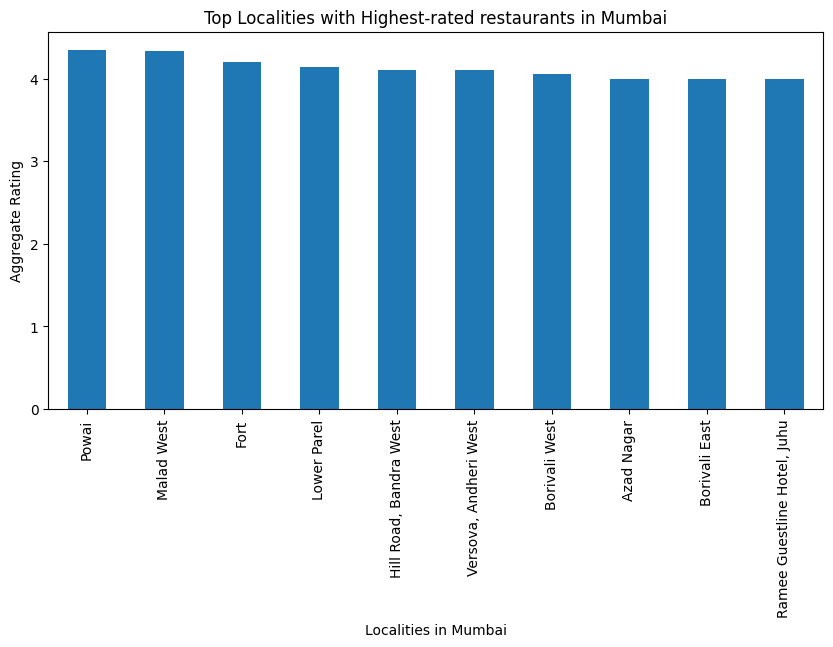

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Top Localities with Highest-rated restaurants in Mumbai')

#plot a bar graph
df_MumRest.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Aggregate Rating')
plt.show()

Localities with the most highest-rated restaurants are **Powai** & **Malad West**.

# **Localities with the worst-rated restaurants in Mumbai**
Now, Let's  move  on to the localities with the worst-rated restaurants and plot them

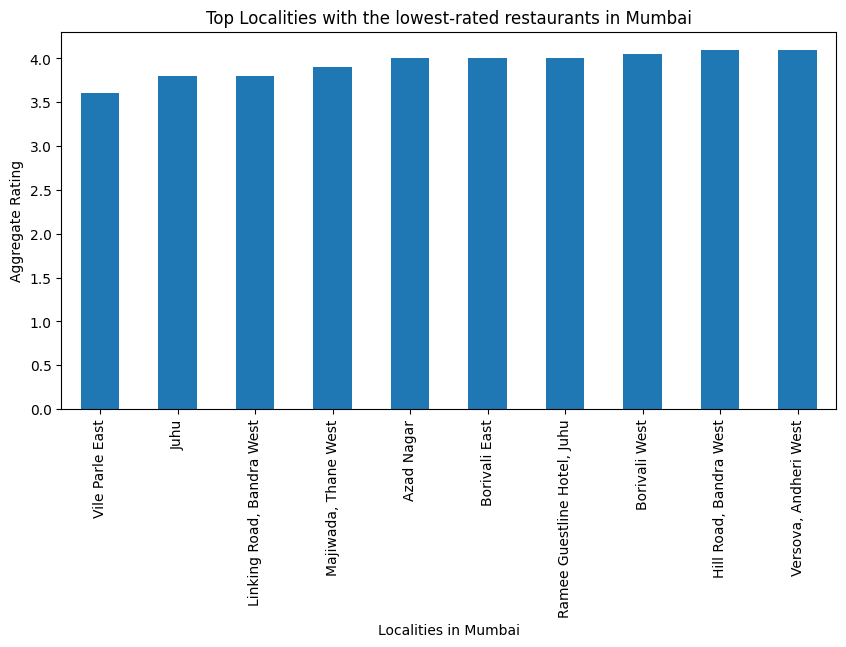

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Top Localities with the lowest-rated restaurants in Mumbai')

df_MumRest.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Aggregate Rating')
plt.show()

Locality with the most lowest-rated restaurants is **Vile-Parle East**.

# **Localities best suited for foodies who prefer eating out a lot**
Now that we have figured out the localities with the highest and lowest rated restaurants, we will explore the neighbourhoods that are the best suited for people who eat out a lot.

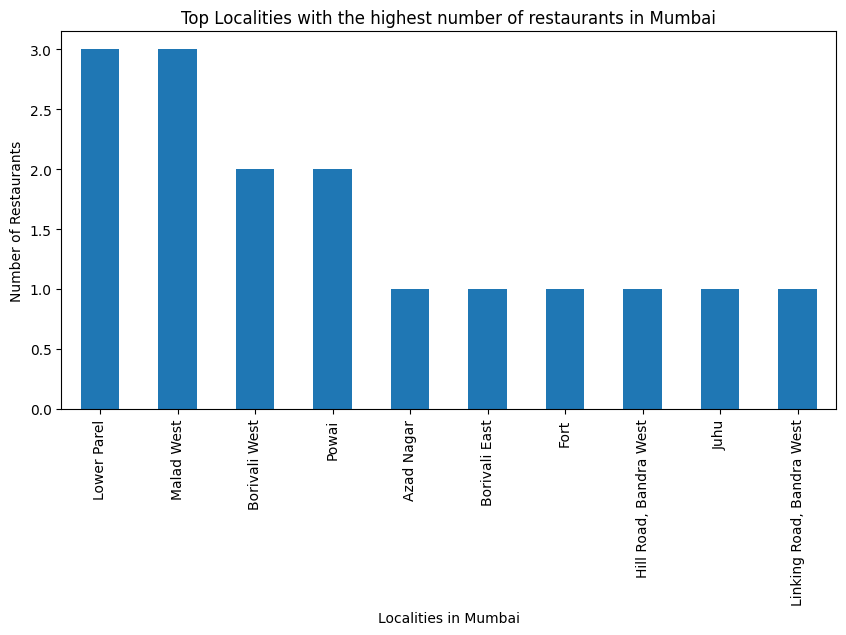

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Top Localities with the highest number of restaurants in Mumbai')

df_MumRest.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Number of Restaurants')
plt.show()

Locality with the highest number of restaurants in Mumbai are  **Lower Parel** & **Malad West**

Let's explore the localities that have the lowest number of restaurants and are the least suited for people who eat out a lot 

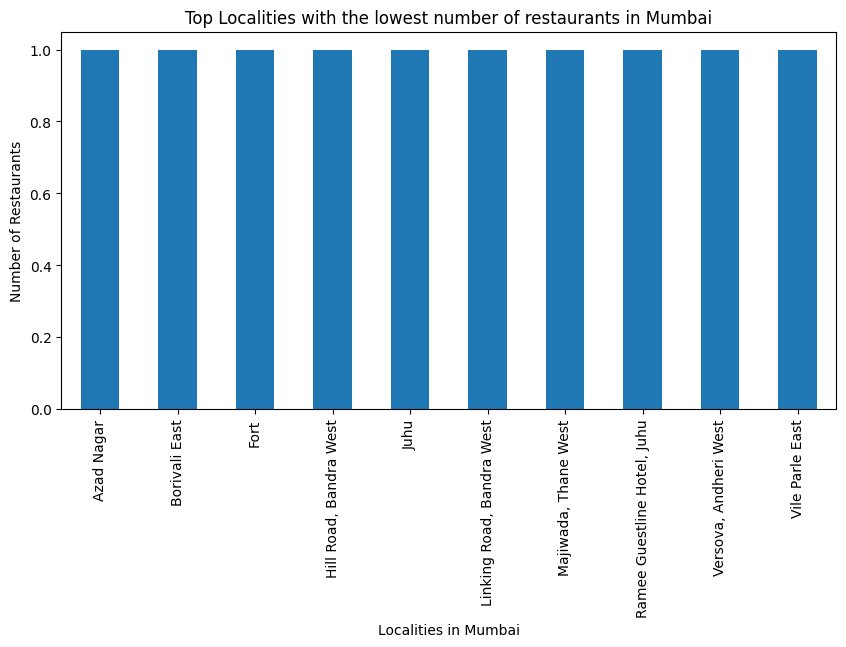

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Top Localities with the lowest number of restaurants in Mumbai')

df_MumRest.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Number of Restaurants')
plt.show()

# **Best places for Italian cuisine in Mumbai**
We are going to group localities according to the highest number of restaurants serving Italian cuisine

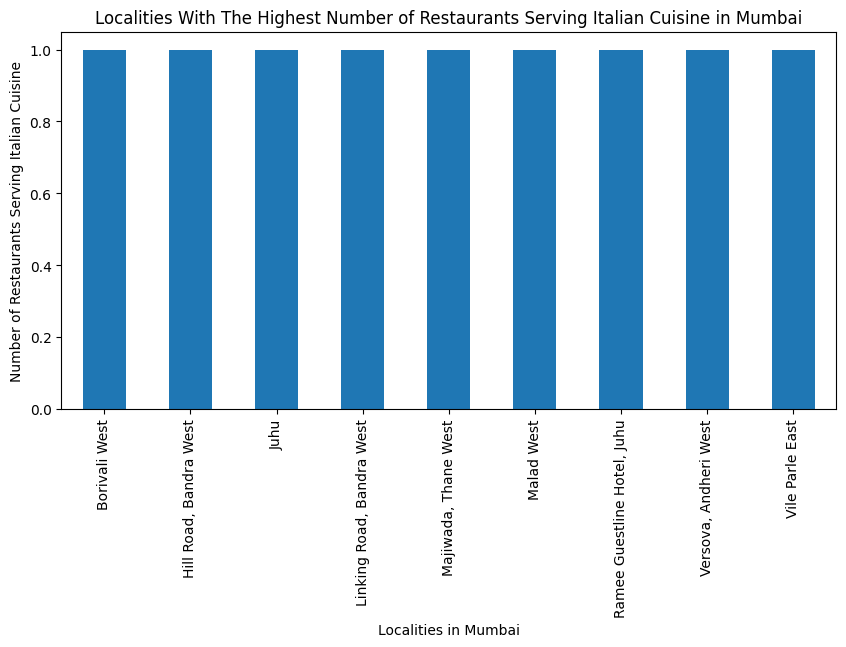

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Localities With The Highest Number of Restaurants Serving Italian Cuisine in Mumbai')

df_MumRest[df_MumRest['Cuisines'].str.contains('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Number of Restaurants Serving Italian Cuisine')
plt.show()

Now, let's group localities according to the number highest-rated restaurants serving Italian cuisine

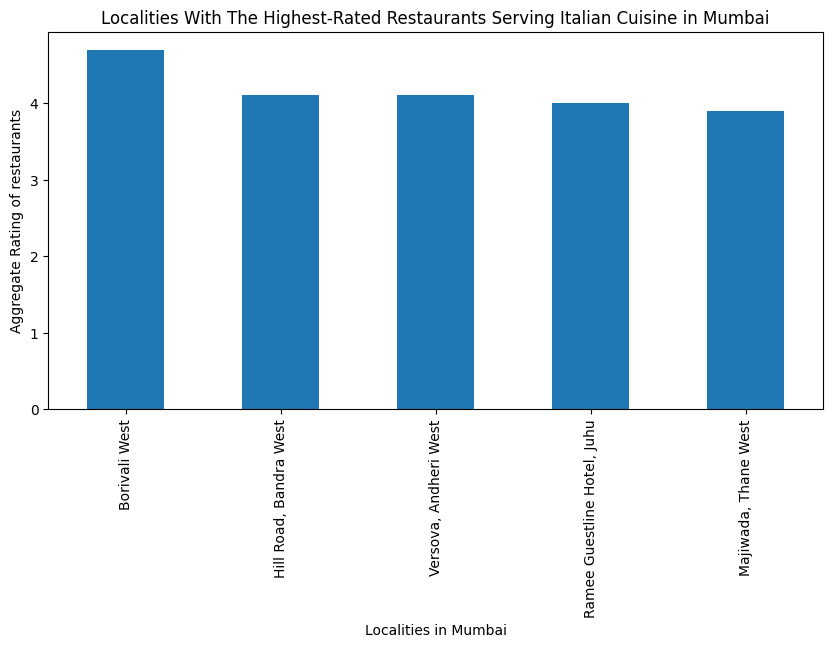

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Localities With The Highest-Rated Restaurants Serving Italian Cuisine in Mumbai')

df_MumRest[df_MumRest['Cuisines'].str.contains('Italian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Localities in Mumbai')
plt.ylabel('Aggregate Rating of restaurants')
plt.show()

# **Data Transformation**
Let's group the data according to locality

In [13]:
df_Loc =  df_MumRest.groupby('Locality').count()['Restaurant Name'].to_frame()
df_AggRating= df_MumRest.groupby('Locality')['Aggregate rating'].mean().to_frame()
df_Cuisines = df_MumRest.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
df_RT = df_MumRest.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
df_V = df_MumRest.groupby(['Locality'])['Votes'].sum().to_frame()
df_Lat = df_MumRest.groupby('Locality').mean()['Latitude'].to_frame()
df_Lng = df_MumRest.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(df_Lat,df_Lng,on='Locality').merge(df_Loc, on='Locality').merge(df_Cuisines, on='Locality').merge(df_AggRating,on ='Locality').merge(df_RT, on ='Locality').merge(df_V, on ='Locality')

In [14]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.00,Very Good,5145
1,Borivali East,19.221315,72.862381,1,Asian,4.00,Very Good,156
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.05,"Average, Excellent",2253
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.20,Very Good,1606
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.10,Very Good,2040


In [15]:
df_final.shape

(14, 8)

Let's Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'BJV5WLCNRLEDXB5U0ZICJRCHMU0WQUF1JI0SFS04FAAUU3XP' # Foursquare ID
CLIENT_SECRET = 'J5ZEUGN12SA52TILQVYLIJJC5PUF13HC12OJSC24E2DCJJDR' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJV5WLCNRLEDXB5U0ZICJRCHMU0WQUF1JI0SFS04FAAUU3XP
CLIENT_SECRET:J5ZEUGN12SA52TILQVYLIJJC5PUF13HC12OJSC24E2DCJJDR


Let's repeat the same process to all the Localities in Mumbai

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now, We will find the venues in every Mumbai locality

In [18]:
Mumbai_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Azad Nagar
Borivali East
Borivali West
Fort
Hill Road, Bandra West
Juhu
Linking Road, Bandra West
Lower Parel
Majiwada, Thane West
Malad West
Powai
Ramee Guestline Hotel, Juhu
Versova, Andheri West
Vile Parle East


In [19]:
Mumbai_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Azad Nagar,19.12663,72.829976,Joey's Pizza,19.126762,72.830001,Pizza Place
1,Azad Nagar,19.12663,72.829976,Tirumala Store,19.128816,72.827619,Women's Store
2,Azad Nagar,19.12663,72.829976,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)
3,Azad Nagar,19.12663,72.829976,48 fitness,19.130918,72.831286,Gym / Fitness Center
4,Azad Nagar,19.12663,72.829976,Living Liquidz,19.130882,72.831212,Liquor Store


In [20]:
Mumbai_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Azad Nagar,9,9,9,9,9,9
Borivali East,11,11,11,11,11,11
Borivali West,9,9,9,9,9,9
Fort,31,31,31,31,31,31
"Hill Road, Bandra West",33,33,33,33,33,33
Juhu,27,27,27,27,27,27
"Linking Road, Bandra West",35,35,35,35,35,35
Lower Parel,58,58,58,58,58,58
"Majiwada, Thane West",31,31,31,31,31,31


In [21]:
print('There are {} uniques categories.'.format(len(Mumbai_venues['Venue Category'].unique())))

There are 115 uniques categories.


In [22]:
Mumbai_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Mumbai_onehot['Locality'] = Mumbai_venues['Locality'] 

column_list = Mumbai_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Mumbai_onehot = Mumbai_onehot[column_list]

Mumbai_onehot.head()

,Locality,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Garden Center,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pizza Place,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
Mumbai_grouped = Mumbai_onehot.groupby('Locality').mean().reset_index()
Mumbai_grouped

,Locality,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Garden Center,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pizza Place,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.111111
1,Borivali East,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000
2,Borivali West,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0

In [24]:
Mumbai_grouped.shape

(14, 116)

In [25]:
# print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Mumbai_grouped['Locality']:
    print("----"+hood+"----")
    temp = Mumbai_grouped[Mumbai_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Azad Nagar----
                  venue  freq
0         Women's Store  0.11
1    Chinese Restaurant  0.11
2  Gym / Fitness Center  0.11
3          Liquor Store  0.11
4                Lounge  0.11


----Borivali East----
                      venue  freq
0         Indian Restaurant  0.27
1            Ice Cream Shop  0.09
2  Bike Rental / Bike Share  0.09
3                      Café  0.09
4               Bus Station  0.09


----Borivali West----
                venue  freq
0                Café  0.33
1          Restaurant  0.22
2        Dessert Shop  0.11
3  Italian Restaurant  0.11
4   Convenience Store  0.11


----Fort----
               venue  freq
0               Café  0.16
1     Breakfast Spot  0.06
2                Bar  0.06
3  Indian Restaurant  0.06
4       Dessert Shop  0.03


----Hill Road, Bandra West----
                venue  freq
0   Indian Restaurant  0.21
1                Café  0.09
2        Gourmet Shop  0.06
3  Chinese Restaurant  0.06
4         Snack Place  0.06


-

In [26]:
# First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
#create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Mumbai_grouped['Locality']

for ind in np.arange(Mumbai_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mumbai_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,Women's Store,Residential Building (Apartment / Condo),Indian Restaurant,Liquor Store,Lounge,Department Store,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Bakery
1,Borivali East,Indian Restaurant,Ice Cream Shop,Garden Center,Department Store,Café,Bus Station,Bike Rental / Bike Share,Shopping Mall,Automotive Shop,Gourmet Shop
2,Borivali West,Café,Restaurant,Convenience Store,Dessert Shop,Italian Restaurant,Snack Place,Fish & Chips Shop,Cupcake Shop,Deli / Bodega,Department Store
3,Fort,Café,Indian Restaurant,Bar,Breakfast Spot,Boutique,Seafood Restaurant,Mughlai Restaurant,Men's Store,New American Restaurant,Coffee Shop
4,"Hill Road, Bandra West",Indian Restaurant,Café,Gourmet Shop,Chinese Restaurant,Snack Place,Women's Store,Fried Chicken Joint,Men's Store,Coffee Shop,Clothing Store
5,Juhu,Hotel,Indian Restaurant,Italian Restaurant,Clothing Store,Restaurant,Gym,Bistro,Dessert Shop,Nightclub,Cosmetics Shop
6,"Linking Road, Bandra West",Indian Restaurant,Bar,Seafood Restaurant,Dessert Shop,Arcade,Asian Restaurant,Lounge,Ice Cream Shop,Modern European Restaurant,Coffee Shop
7,Lower Parel,Indian Restaurant,Shopping Mall,Café,Pizza Place,Clothing Store,Chinese Restaurant,Asian Restaurant,Pub,Italian Restaurant,Mediterranean Restaurant
8,"Majiwada, Thane West",Indian Restaurant,Clothing Store,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant,Multiplex,Coffee Shop,Department Store,Pizza Place
9,Malad West,Coffee Shop,Café,Fast Food Restaurant,Italian Restaurant,Dessert Shop,Diner,Outdoors & Recreation,Dumpling Restaurant,Pizza Place,Chinese Restaurant


In [28]:
# Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Mumbai_clustering = Mumbai_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(14,)

In [29]:
# add clustering labels
Mumbai_merged = df_final.head(240)
Mumbai_merged['Cluster Labels'] = kmeans.labels_

Mumbai_merged = Mumbai_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Mumbai_merged.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.00,Very Good,5145,4,Women's Store,Residential Building (Apartment / Condo),Indian Restaurant,Liquor Store,Lounge,Department Store,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Bakery
1,Borivali East,19.221315,72.862381,1,Asian,4.00,Very Good,156,1,Indian Restaurant,Ice Cream Shop,Garden Center,Department Store,Café,Bus Station,Bike Rental / Bike Share,Shopping Mall,Automotive Shop,Gourmet Shop
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.05,"Average, Excellent",2253,2,Café,Restaurant,Convenience Store,Dessert Shop,Italian Restaurant,Snack Place,Fish & Chips Shop,Cupcake Shop,Deli / Bodega,Department Store
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.20,Very Good,1606,3,Café,Indian Restaurant,Bar,Breakfast Spot,Boutique,Seafood Restaurant,Mughlai Restaurant,Men's Store,New American Restaurant,Coffee Shop
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.10,Very Good,2040,1,Indian Restaurant,Café,Gourmet Shop,Chinese Restaurant,Snack Place,Women's Store,Fried Chicken Joint,Men's Store,Coffee Shop,Clothing Store


# **Create a Map**

In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Mumbai_merged['Lat'], Mumbai_merged['Lng'], Mumbai_merged['Locality'], Mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [31]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 0, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,19.103249,3.6,Good,1515,0,Tea Room,Chinese Restaurant,Market,Fast Food Restaurant,Martial Arts School,Juice Bar,Snack Place,Diner,Maharashtrian Restaurant,Indian Restaurant


Cluster 2

In [32]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 1, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,19.221315,4.00,Very Good,156,1,Indian Restaurant,Ice Cream Shop,Garden Center,Department Store,Café,Bus Station,Bike Rental / Bike Share,Shopping Mall,Automotive Shop,Gourmet Shop
4,19.055831,4.10,Very Good,2040,1,Indian Restaurant,Café,Gourmet Shop,Chinese Restaurant,Snack Place,Women's Store,Fried Chicken Joint,Men's Store,Coffee Shop,Clothing Store
8,19.207222,3.90,Good,317,1,Indian Restaurant,Clothing Store,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant,Multiplex,Coffee Shop,Department Store,Pizza Place
10,19.121041,4.35,"Excellent, Good",3425,1,Indian Restaurant,Café,Bar,Asian Restaurant,Chinese Restaurant,Italian Restaurant,Clothing Store,Fast Food Restaurant,Hotel,Department Store


Cluster 3

In [33]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 2, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,19.239203,4.05,"Average, Excellent",2253,2,Café,Restaurant,Convenience Store,Dessert Shop,Italian Restaurant,Snack Place,Fish & Chips Shop,Cupcake Shop,Deli / Bodega,Department Store


Cluster 4

In [34]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 3, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,18.927584,4.200000,Very Good,1606,3,Café,Indian Restaurant,Bar,Breakfast Spot,Boutique,Seafood Restaurant,Mughlai Restaurant,Men's Store,New American Restaurant,Coffee Shop
5,19.091458,3.800000,Good,617,3,Hotel,Indian Restaurant,Italian Restaurant,Clothing Store,Restaurant,Gym,Bistro,Dessert Shop,Nightclub,Cosmetics Shop
6,19.065838,3.800000,Good,146,3,Indian Restaurant,Bar,Seafood Restaurant,Dessert Shop,Arcade,Asian Restaurant,Lounge,Ice Cream Shop,Modern European Restaurant,Coffee Shop
7,18.997268,4.133333,"Good, Very Good",6686,3,Indian Restaurant,Shopping Mall,Café,Pizza Place,Clothing Store,Chinese Restaurant,Asian Restaurant,Pub,Italian Restaurant,Mediterranean Restaurant
9,19.178630,4.333333,"Excellent, Good",3960,3,Coffee Shop,Café,Fast Food Restaurant,Italian Restaurant,Dessert Shop,Diner,Outdoors & Recreation,Dumpling Restaurant,Pizza Place,Chinese Restaurant
11,19.109300,4.000000,Very Good,536,3,Café,Chinese Restaurant,Indian Restaurant,Bar,Cocktail Bar,Hotel,Asian Restaurant,Coffee Shop,Lounge,Donut Shop
12,19.131141,4.100000,Very Good,1295,3,Café,Ice Cream Shop,Beach,Bar,Arts & Crafts Store,Coffee Shop,Salon / Barbershop,Sandwich Place,Music Venue,Seafood Restaurant


Cluster 5

In [35]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 4, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19.12663,4.0,Very Good,5145,4,Women's Store,Residential Building (Apartment / Condo),Indian Restaurant,Liquor Store,Lounge,Department Store,Pizza Place,Chinese Restaurant,Gym / Fitness Center,Bakery


* Borivali west, Bandra West, Versova, Juhu are some of the best neighborhoods for Italian cuisine.
* Lower Parel, Malad West, Powai are the best places for foodies who like eating frequently.
* Powai, Malad West, Fort have the highest-rated resturants in Mumbai. 
** Cluster 1, Cluster 3 & Cluster 4: It is most recommended for tea rooms & cafes
** Cluster 2: It is most recommended for Indian Restaurants. 
** Cluster 5: It is most recommended for Stores.